In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange
from simulate import *
from mwis import *
from greedy import *
from ef import *


/Users/joeykhuang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Set parameter Username
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2503416
Academic license 2503416 - for non-commercial use only - registered to jo___@college.harvard.edu


### Greedy and Greedy with Bipartite Matching

In [4]:

num_trials = 10
num_simulations = 200
sim_df = pd.DataFrame(columns=["m", "n", "trial", "greedy_ratio", "greedy_match_ratio"])
for i in trange(num_trials):
    for n in range(2, 5):
        for m in range(n, 2 * n + 1):
            greedy_scores, greedy_match_scores, optimal_scores = simulate(m, n, num_simulations, 0)
            sim_df.loc[len(sim_df)] = {'m': m, 'n': n, 'trial': i, 'greedy_ratio': np.mean(np.divide(greedy_scores, optimal_scores)), 'greedy_match_ratio': np.mean(np.divide(greedy_match_scores, optimal_scores))}

m, n = 4, 3
num_trials = 50
num_simulations = 200
sim_df_alpha = pd.DataFrame(columns=["alpha", "trial", "greedy_ratio", "greedy_match_ratio"])
for i in trange(num_trials):
    for alpha in np.arange(0, 1.1, 0.1):
        greedy_scores, greedy_match_scores, optimal_scores = simulate(m, n, num_simulations, alpha)
        sim_df_alpha.loc[len(sim_df_alpha)] = {'alpha': alpha, 'trial': i, 'greedy_ratio': np.mean(np.divide(greedy_scores, optimal_scores)), 'greedy_match_ratio': np.mean(np.divide(greedy_match_scores, optimal_scores))}

sim_df.to_csv("roommate_sim_greedy.csv")
sim_df_alpha.to_csv("roommate_sim_greedy_with_alpha.csv")



100%|██████████| 50/50 [05:44<00:00,  6.89s/it]


### MWIS with m = 2n

In [ ]:
num_trials = 10
num_simulations = 200
sim_df_mwis = pd.DataFrame(columns=["n", "trial", "greedy", "greedy_match", "mwis", "optimal"])
for n in range(2, 8):
    for i in trange(num_trials):
        m = 2 * n
        if n <= 5:
            greedy_scores, greedy_match_scores, mwis_scores, optimal_scores = simulate_mwis(m, n, num_simulations)
        else:
            greedy_scores, greedy_match_scores, mwis_scores, optimal_scores = simulate_mwis(m, n, num_simulations, do_optimal=False)
            optimal_scores = 0

        sim_df_mwis.loc[len(sim_df_mwis)] = {'n': n, 'trial': i, 'greedy': np.mean(greedy_scores), 'greedy_match': np.mean(greedy_match_scores), 'mwis': np.mean(mwis_scores), 'optimal': np.mean(optimal_scores)}

sim_df_mwis.to_csv('roommate_sim_mwis.csv')

m, n, num_simulations = 6, 3, 1000
greedy_scores, greedy_match_scores, mwis_scores, optimal_scores = simulate_mwis(m, n, num_simulations)

sort_idx = np.argsort(np.divide(greedy_match_scores, optimal_scores))
#plt.plot(np.divide(greedy_scores, optimal_scores)[sort_idx])
plt.plot(np.divide(greedy_match_scores, optimal_scores)[sort_idx])
plt.plot(np.divide(mwis_scores, optimal_scores)[sort_idx])
plt.legend(["Greedy with matching", "MWIS"])

match_divide = np.divide(greedy_match_scores, optimal_scores)[sort_idx]
mwis_divide = np.divide(mwis_scores, optimal_scores)[sort_idx]
pd.concat([pd.DataFrame(match_divide), pd.DataFrame(mwis_divide)]).to_csv('mwis_indiv.csv')

### MWIS with m < 2n

In [8]:
num_trials = 10
num_simulations = 200
#sim_scores = {}
sim_df_ghosts = pd.DataFrame(columns=["m", "n", "trial", "greedy_ratio", "greedy_match_ratio", "mwis_ghost_ratio"])
for i in trange(num_trials):
    for n in range(2, 5):
        for m in range(n, 2 * n + 1):
            greedy_scores, greedy_match_scores, mwis_scores, optimal_scores = simulate_mwis_with_ghosts(m, n, num_simulations, 0.5)

            sim_df_ghosts.loc[len(sim_df_ghosts)] = {'m': m, 'n': n, 'trial': i, 'greedy_ratio': np.mean(np.divide(greedy_scores, optimal_scores)), 'greedy_match_ratio': np.mean(np.divide(greedy_match_scores, optimal_scores)), 'mwis_ghost_ratio': np.mean(np.divide(mwis_scores, optimal_scores))}

sim_df_ghosts.to_csv("sim_df_ghosts.csv")

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [10:29<00:00, 62.94s/it]


### MWIS runtime simulation

100%|██████████| 10/10 [03:37<00:00, 21.76s/it]


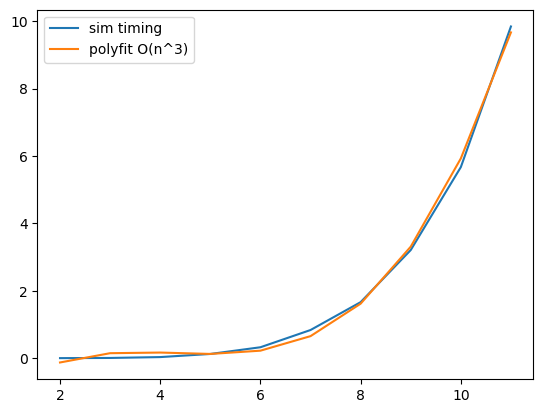

In [2]:
timings = runtime_sim()
z = np.polyfit(x=np.array(range(2, 12)), y=np.array(timings), deg=3)
p3 = np.poly1d(z)

x = np.linspace(2, 11, 10)
plt.plot(x, timings)
plt.plot(x, p3(x))
plt.legend(["sim timing", "polyfit O(n^3)"])

pd.DataFrame(timings).to_csv("runtime.csv")

### Envy-freeness

In [2]:
"""## Envy-Freeness"""
num_trials = 1
num_simulations = 200
num_found_df = pd.DataFrame(columns=["epsilon", "trial", "greedy_match_num_found", "mwis_num_found"])
for i in trange(num_trials):
    for inv_epsilon in np.arange(0.1, 1.1, 0.1):
        greedy_match_results, mwis_results, greedy_envies, mwis_envies, greedy_match_found_sol, mwis_found_sol = simulate_ef_prices(6, 3, num_simulations, inv_epsilon)
        num_found_df.loc[len(num_found_df)] = {'epsilon': 1/inv_epsilon, 'trial': i, 'greedy_match_num_found': greedy_match_found_sol, 'mwis_num_found': mwis_found_sol}

num_found_df.to_csv("ef_num_found.csv")

  0%|          | 0/1 [00:00<?, ?it/s]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-04-15


100%|██████████| 1/1 [00:37<00:00, 37.60s/it]


In [3]:
num_simulations = 2000
greedy_match_results, mwis_results, greedy_envies, mwis_envies, greedy_match_found_sol, mwis_found_sol = simulate_ef_prices(6, 3, num_simulations, None, False)
ns_greedy_envies = [item for row in greedy_envies for item in row]
ns_mwis_envies = [item for row in mwis_envies for item in row]

greedy_match_results, mwis_results, greedy_envies, mwis_envies, greedy_match_found_sol, mwis_found_sol = simulate_ef_prices(6, 3, num_simulations, None, True)
s_greedy_envies = [item for row in greedy_envies for item in row]
s_mwis_envies = [item for row in mwis_envies for item in row]

pd.DataFrame.from_dict({"no_share_greedy": ns_greedy_envies, "no_share_mwis": ns_mwis_envies, "share_greedy": s_greedy_envies, "share_mwis": s_mwis_envies}, orient='index').transpose().to_csv("envies.csv")
